# Experiments and tests

In [1]:
from PictogramGrid import Pictogram,Page,Grid
from EvaluationGrid import grid_distance_cost,sentence_distance_cost,grid_cost
from gpgo import gpgo
import os

corpus = []
input_csv_file = "default.csv"

for root, dirs, files in os.walk("training_corpora"):
    for name in files:
        corpus.append(os.path.join(root,name))

my_gpgo= gpgo(corpus,corpus,pop_size=100,cross_proba=0.5,cross_info_rate=0.5,
              mutation_proba=0.5,select_number=50,gen_number=500,randomizer=True,
              page_row_size = 5, page_col_size = 5,similarity_coefficient = 0)

g = my_gpgo.genetic_algorithm()

####### Genetic Pictogram Grid Communication Optimizer #######

## Optimizer Parameters ##
------------------------------------------------------------------------
  INITIAL POPULATION SIZE : 100

  NUMBER OF GENERATION : 500

  CROSSOVER RATE : 50.0%     MUTATION RATE : 50.0%

  CROSSOVER INFORMATION RATE : 50.0%

------------------------------------------------------------------------



Optimization : 100%|█████████████████████████████████████████████████████████| 500/500 [03:00<00:00,  2.77generation/s]

DEBUG : Best individual --> Generation : 497, Fitness : 7.311886164077165


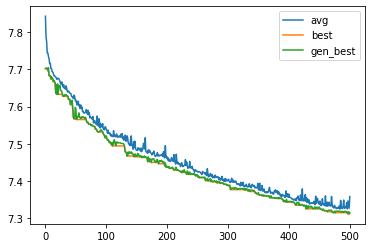

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

g.to_csv()

#Plot the history
avg = my_gpgo.fitness_history("average")
best = my_gpgo.fitness_history("only_best")
gen_best = my_gpgo.fitness_history("gen_best")

plt.plot(avg,label = "avg")
plt.plot(best,label = "best")
plt.plot(gen_best,label = "gen_best")

plt.legend()
plt.show()